Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Data Collection and Analysis

PIMA Diabetes Dataset

In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [3]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(3768, 9)

In [5]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,3768.000000,3768.000000,3768.000000,3768.000000,3768.000000,3768.000000,3768.000000,3768.000000,3768.000000
mean,3.842887,121.594480,69.276805,20.624204,79.615180,31.954883,0.475124,33.310510,0.352972
std,3.346822,32.766667,19.186774,16.042152,114.653504,7.747486,0.335679,11.880396,0.477958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,143.000000,80.000000,32.000000,129.000000,36.600000,0.630000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,2438
1,1330


0 --> Non-Diabetic

1 --> Diabetic

In [7]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.328548,110.702625,68.240771,19.687449,69.802297,30.181255,0.434588,31.333880
1,4.785714,141.560150,71.175940,22.341353,97.603008,35.206090,0.549429,36.933835


In [8]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               6      148             72             35        0  33.6   
1               1       85             66             29        0  26.6   
2               8      183             64              0        0  23.3   
3               1       89             66             23       94  28.1   
4               0      137             40             35      168  43.1   
...           ...      ...            ...            ...      ...   ...   
3763            3      150             76              0        0  21.0   
3764            3      173             82             48      465  38.4   
3765            1       90             62             18       59  25.1   
3766            4      117             62             12        0  29.7   
3767            8      151             78             32      210  42.9   

      DiabetesPedigreeFunction  Age  
0                        0.627   50  
1                      

In [9]:
print(Y)

0       1
1       0
2       1
3       0
4       1
       ..
3763    0
3764    1
3765    0
3766    1
3767    1
Name: Outcome, Length: 3768, dtype: int64


Train Test Split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [11]:
print(X.shape, X_train.shape, X_test.shape)

(3768, 8) (3014, 8) (754, 8)


Training the Model

In [12]:
classifier = svm.SVC(kernel='linear')

In [14]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [15]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [16]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7780358327803584


In [17]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [18]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7639257294429708


Making a Predictive System

In [19]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Saving the trained model

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [23]:
y_pred = model.predict(X_test)

--- Training Logistic Regression ---


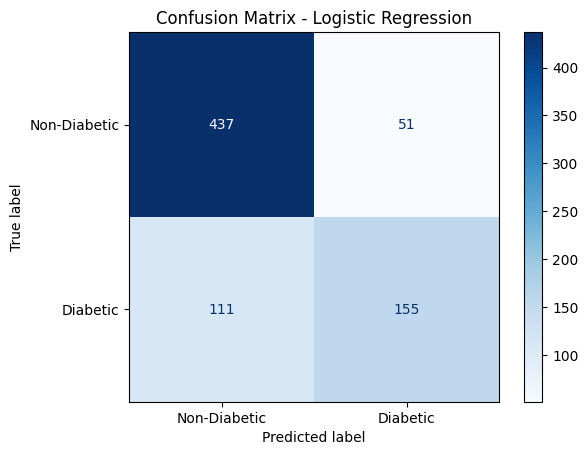

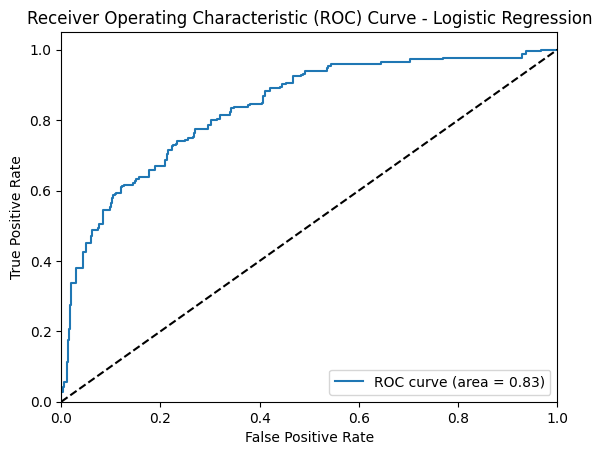

--- Training K-Nearest Neighbors (KNN) ---


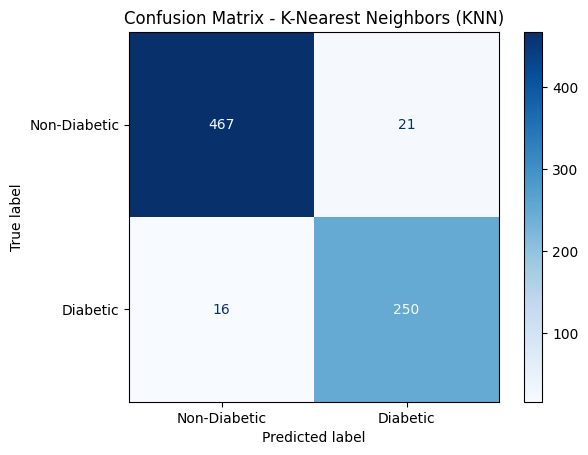

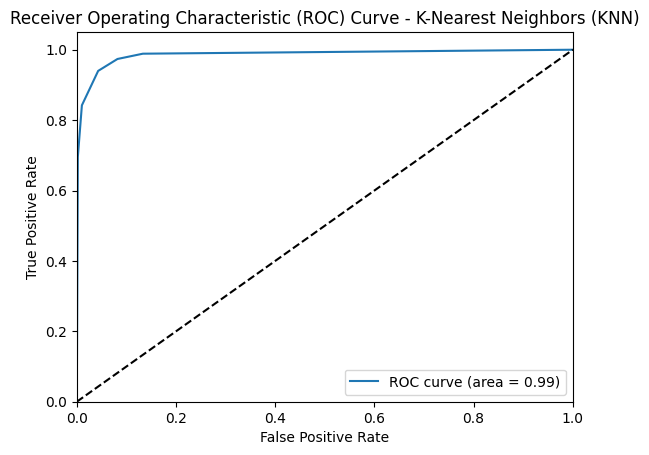

--- Training Stochastic Gradient Descent (SGD) ---


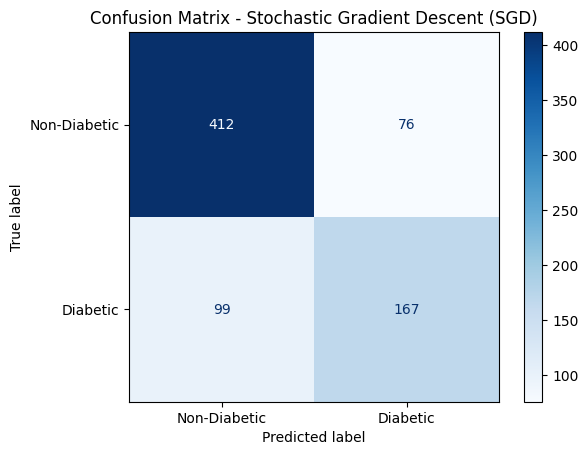

--- Training Support Vector Machine (SVM) ---


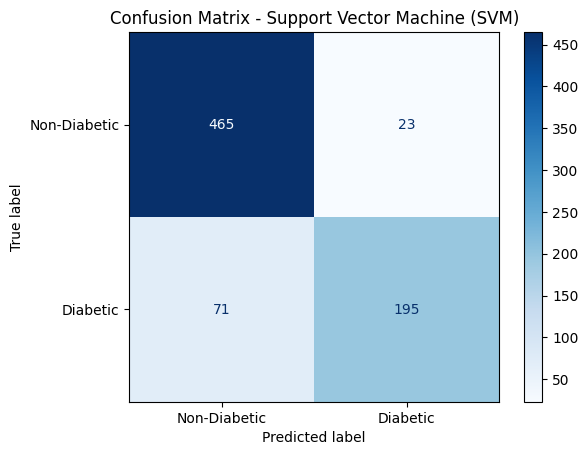

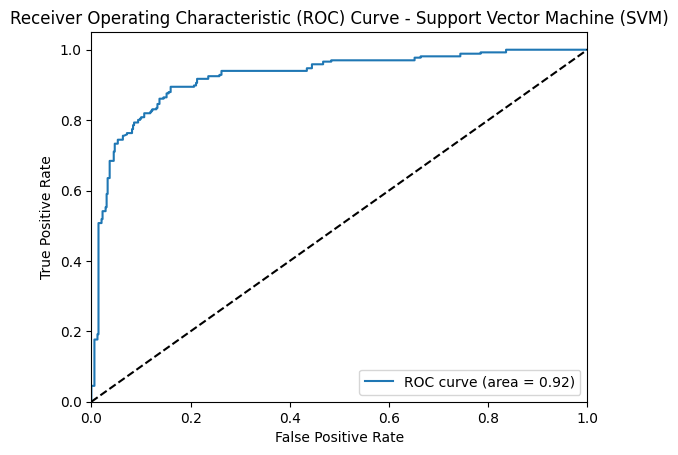

--- Training Naive Bayes ---


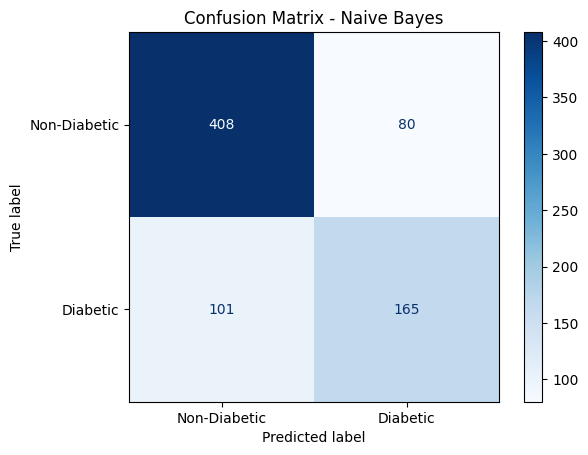

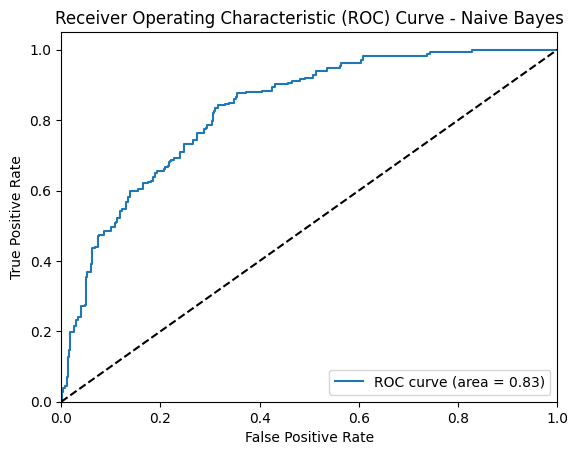

--- Training Decision Tree ---


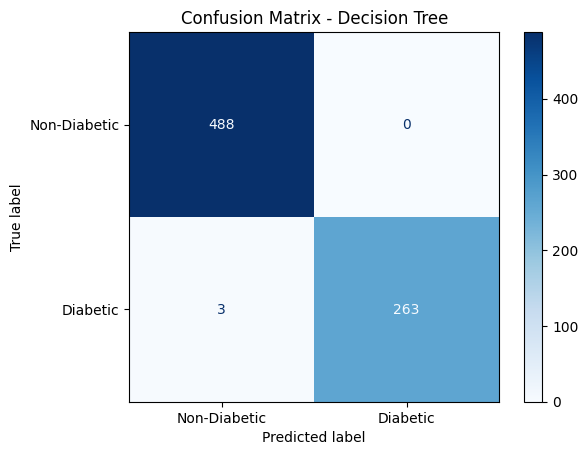

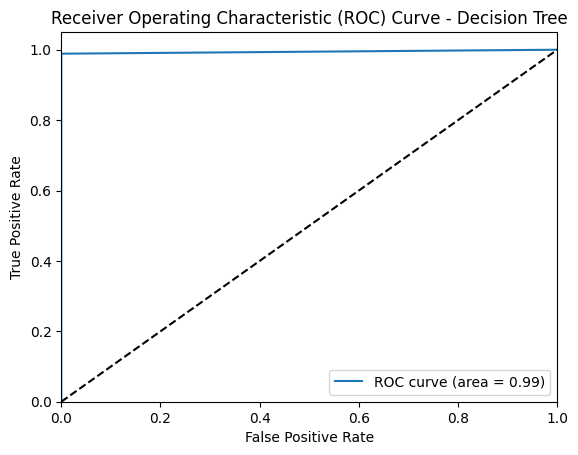

--- Training Random Forest ---


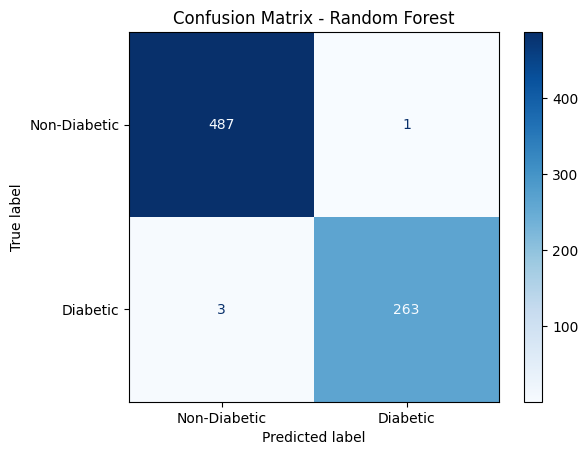

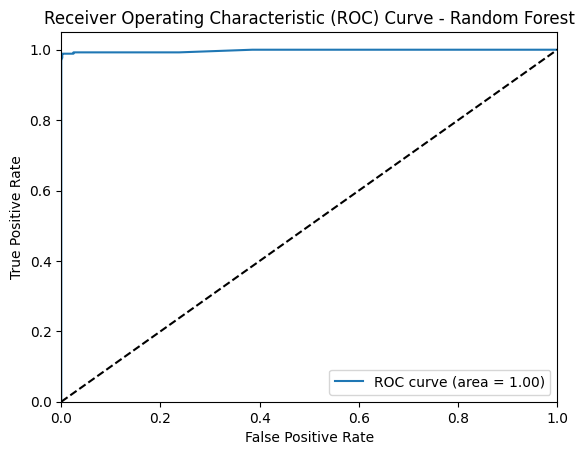

--- Training XGBoost ---


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:28:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


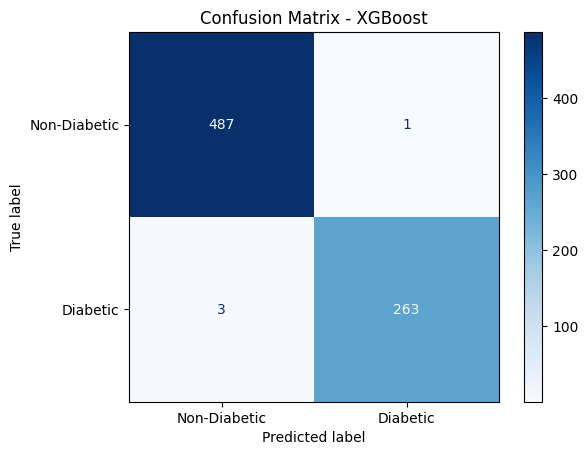

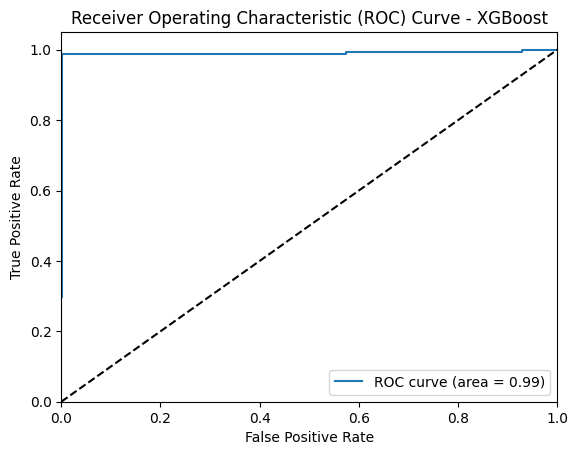



--- Model Performance Summary ---
                                   Accuracy Precision    Recall  F1 Score  \
Logistic Regression                0.785146  0.752427  0.582707   0.65678   
K-Nearest Neighbors (KNN)          0.950928  0.922509   0.93985  0.931099   
Stochastic Gradient Descent (SGD)  0.767905  0.687243   0.62782  0.656189   
Support Vector Machine (SVM)       0.875332  0.894495  0.733083  0.805785   
Naive Bayes                        0.759947  0.673469  0.620301  0.645793   
Decision Tree                      0.996021       1.0  0.988722  0.994329   
Random Forest                      0.994695  0.996212  0.988722  0.992453   
XGBoost                            0.994695  0.996212  0.988722  0.992453   

                                    ROC-AUC  
Logistic Regression                0.833916  
K-Nearest Neighbors (KNN)           0.98566  
Stochastic Gradient Descent (SGD)       N/A  
Support Vector Machine (SVM)       0.922728  
Naive Bayes                         0.82

In [33]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve

# Import the models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# --- 1. Load and Prepare the Data ---
# Load your dataset from a CSV file
# Make sure the target variable (what you want to predict) is in a column named 'Outcome'
try:
    df = pd.read_csv('/content/diabetes.csv')
except FileNotFoundError:
    print("Error: 'diabetes.csv' not found. Please replace with the actual path to your data.")
    # As a placeholder, creating a dummy dataframe
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=208, n_features=60, n_informative=10, n_redundant=10, random_state=42)
    df = pd.DataFrame(X)
    df['Outcome'] = y # Changed 'target' to 'Outcome'


# Separate features (X) and the target variable (y)
X = df.drop('Outcome', axis=1) # Changed 'target' to 'Outcome'
y = df['Outcome'] # Changed 'target' to 'Outcome'

# --- 2. Split the Data into Training and Testing Sets ---
# This divides the data so you can train the model on one part and test its performance on another.
# test_size=0.2 means 20% of the data will be used for testing.
# random_state ensures the split is the same every time you run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Added stratify

# --- 3. Scale the Features (Optional but Recommended) ---
# Scaling standardizes the feature values (e.g., mean=0, std=1), which helps many models perform better.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --- 4. Initialize and Train the Models ---

# Create a dictionary to hold all the models you want to train
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Stochastic Gradient Descent (SGD)": SGDClassifier(),
    "Support Vector Machine (SVM)": SVC(probability=True), # probability=True is needed for ROC-AUC
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Loop through each model, train it, and store its performance
results = {}
for name, model in models.items():
    print(f"--- Training {name} ---")

    # Train the model on the (scaled) training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'


    # Store the results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc
    }

    # Display Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic'])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Display ROC Curve
    if y_pred_proba is not None and roc_auc != 'N/A':
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()


# --- 5. Display the Results ---
print("\n\n--- Model Performance Summary ---")
results_df = pd.DataFrame(results).T
print(results_df)

## Making Predictions with the Loaded Model

## Model Evaluation (Random Forest)

In [34]:
# Accuracy score on the training data
X_train_prediction_rf = model.predict(X_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction_rf, Y_train)
print('Accuracy score of the training data (Random Forest): ', training_data_accuracy_rf)

# Accuracy score on the test data
X_test_prediction_rf = model.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction_rf, Y_test)
print('Accuracy score of the test data (Random Forest): ', test_data_accuracy_rf)

Accuracy score of the training data (Random Forest):  0.4230258792302588
Accuracy score of the test data (Random Forest):  0.4482758620689655


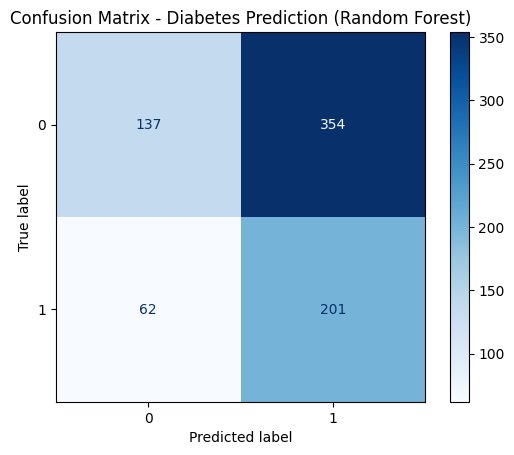

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Diabetes Prediction (Random Forest)")
plt.show()

In [36]:
import pickle

In [37]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [38]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [39]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
